Article: https://www.embedded-robotics.com/regression-modelling/\
Code: Boston Housing Dataset Regression Modelling - Price Estimation using Support Vector Machines, Random Forest, Gradient Boost, and Linear Regression\
Dataset Link: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/\
Prepared By: Awais Naeem (awais.naeem@embedded-robotics.com)\
Copyrights: www.embedded-robotics.com\
Disclaimer: This code can be distributed with the proper mention of the owner copyrights

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [4]:
%matplotlib inline

#### Part 1: Data Reading, Pre-processing and Exploratory Analysis

In [5]:
housing_data_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'Bk', 'LSTAT', 'MEDV']
housing_data = pd.read_csv('housing.data', header=None, delim_whitespace=True, names=housing_data_columns)
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Bk,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
housing_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
Bk         0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
housing_data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
Bk         float64
LSTAT      float64
MEDV       float64
dtype: object

In [8]:
housing_data = housing_data.astype('float32')

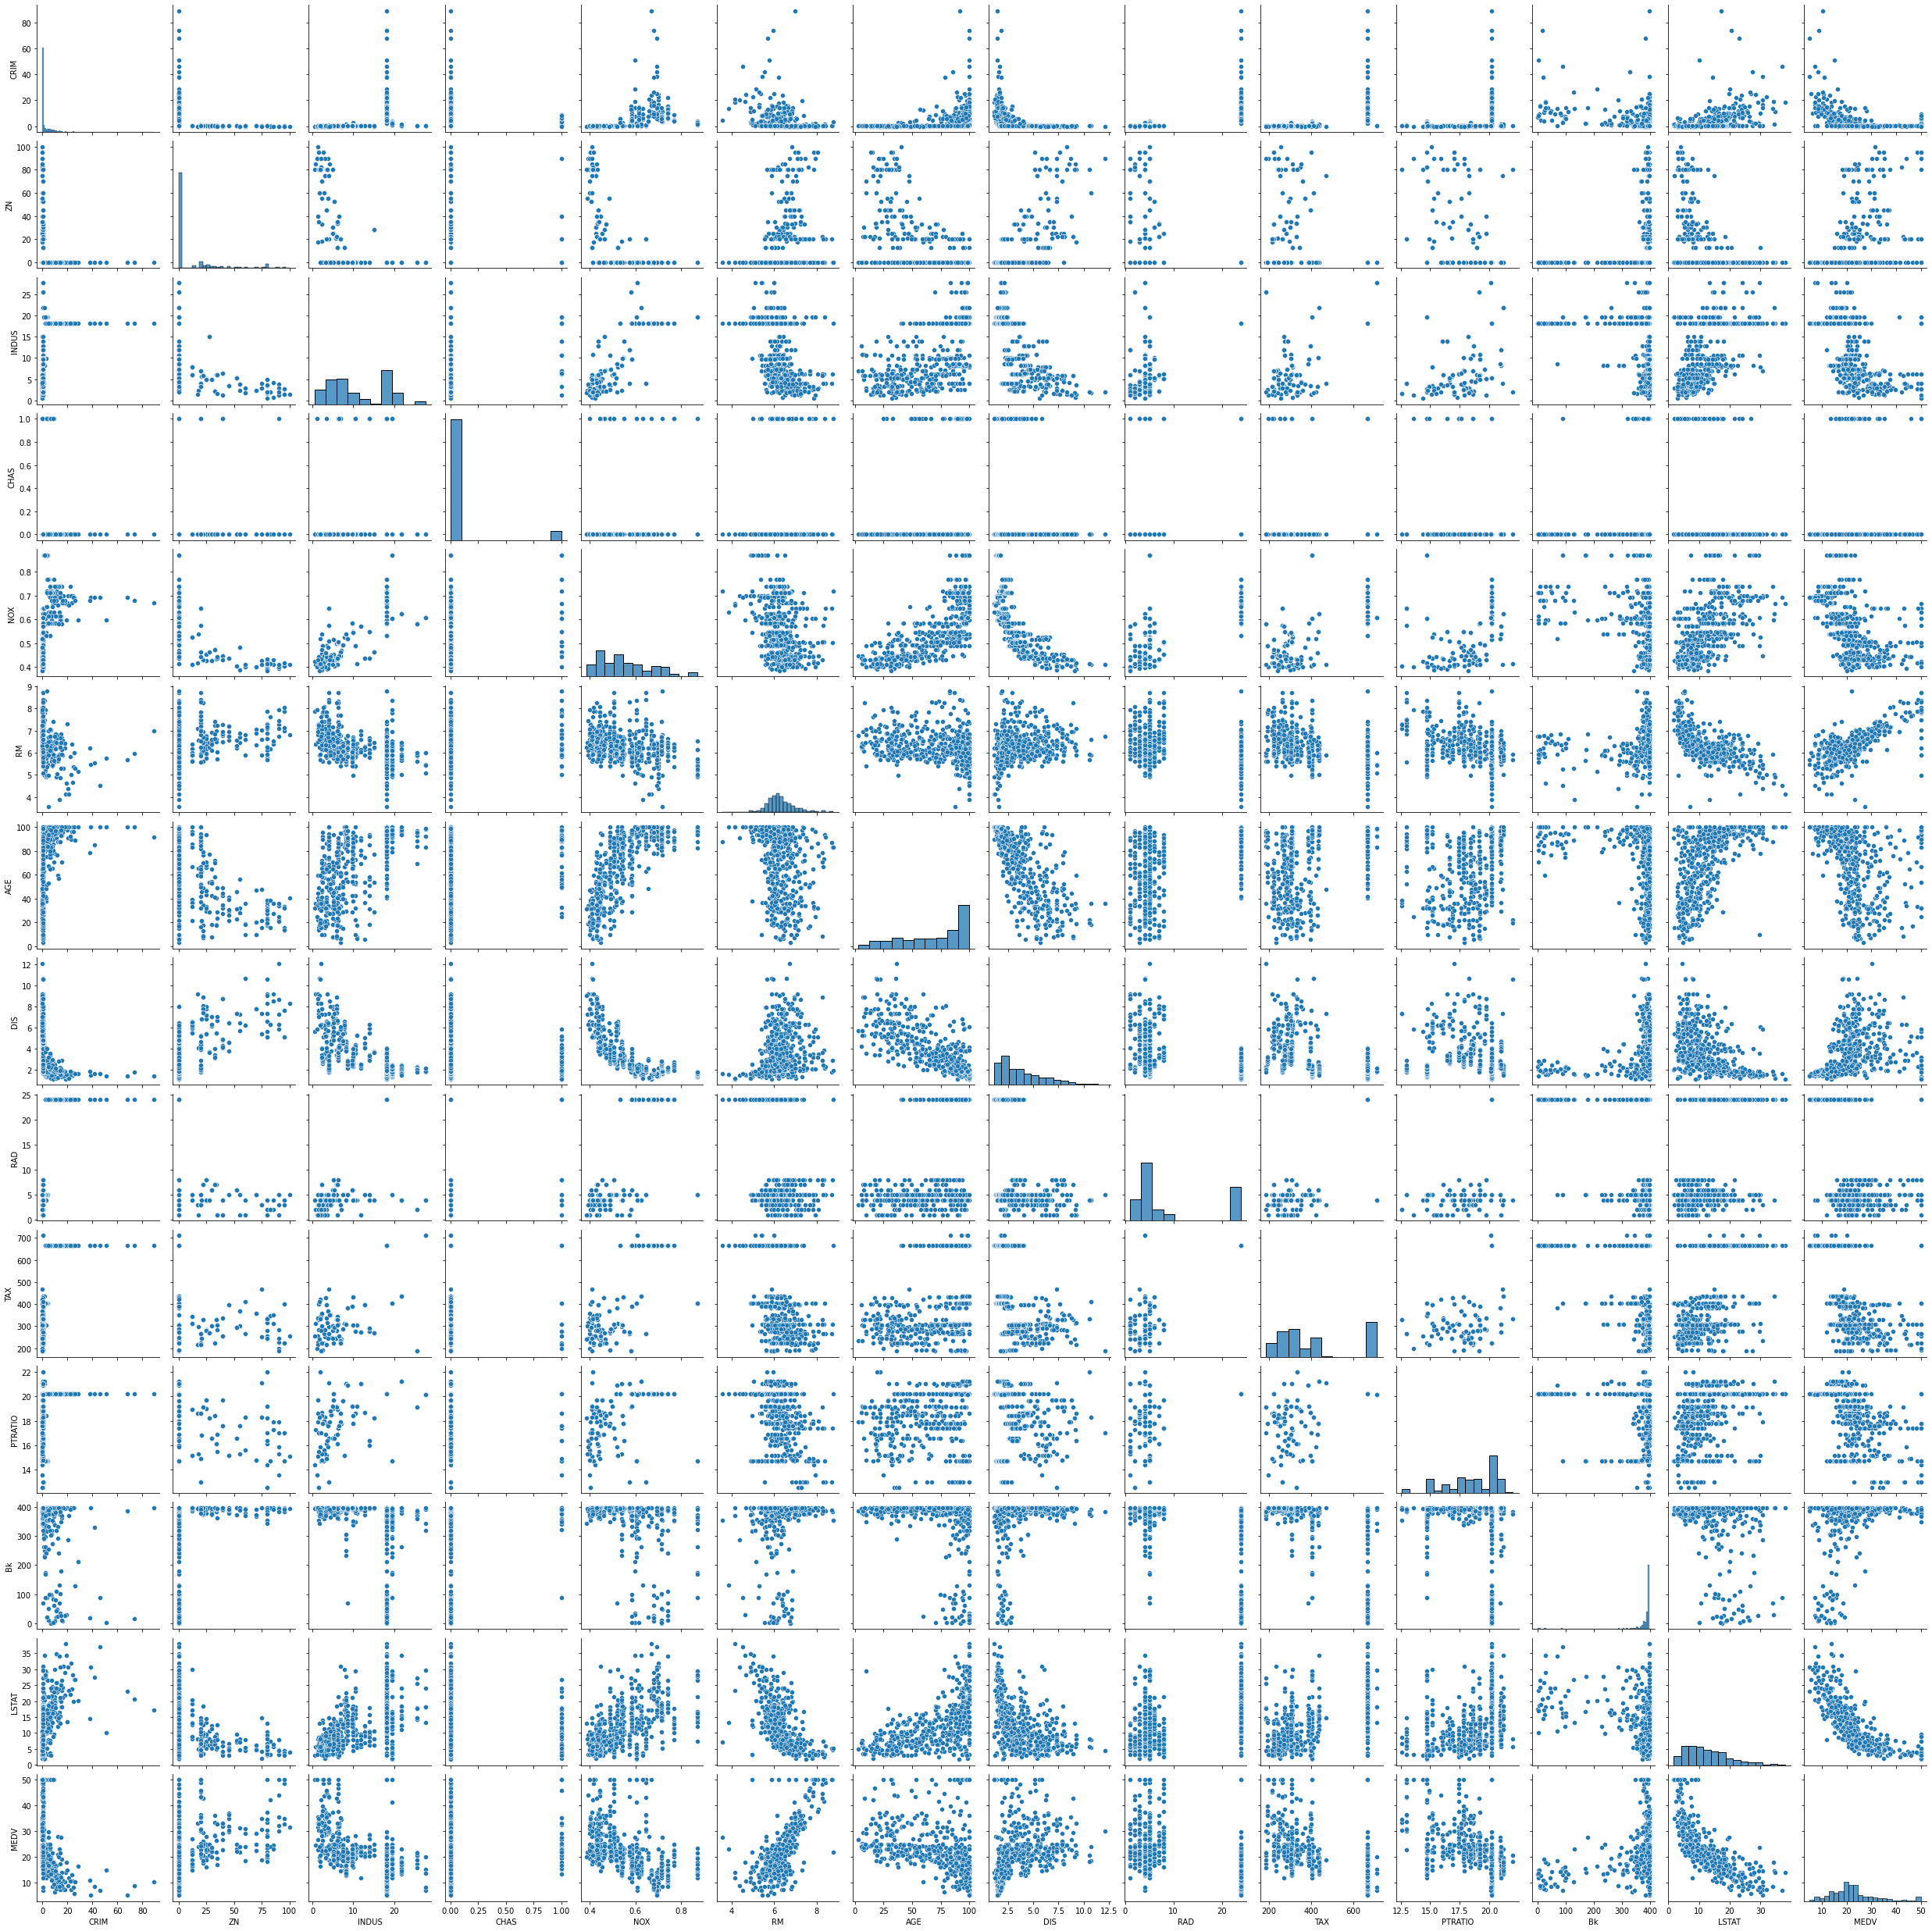

In [9]:
sns.pairplot(housing_data)

In [10]:
data_corr = housing_data.corr()
data_corr['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
Bk         0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

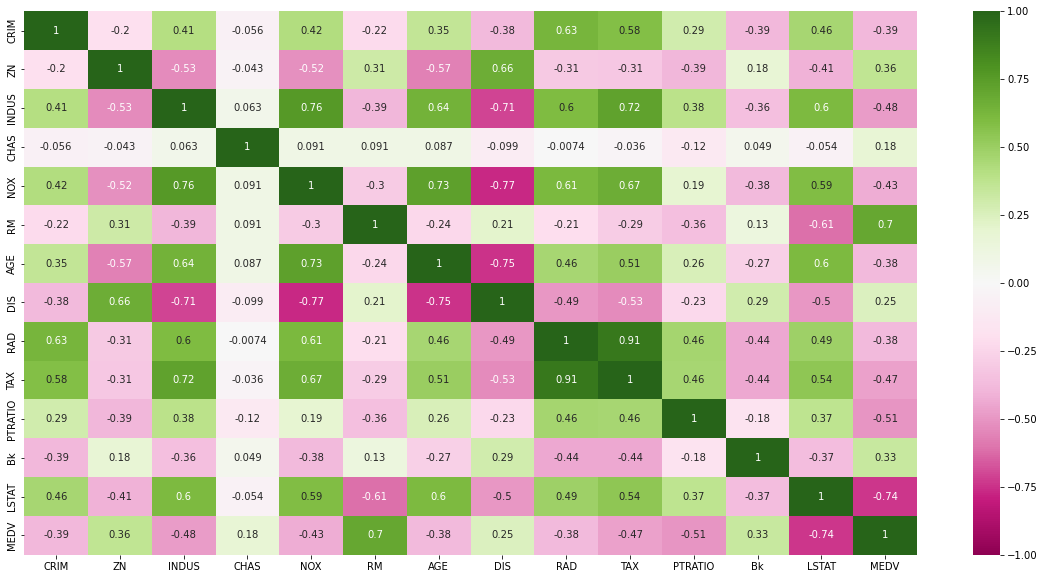

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(data_corr, vmin=-1, vmax=1, cmap='PiYG', annot=True)
plt.show()

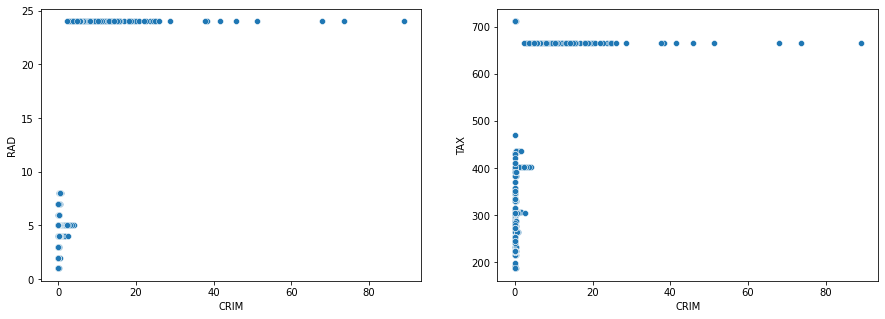

In [12]:
fig, axes = plt.subplots(1, 2, sharex = True, figsize=(15, 5))
sns.scatterplot(data=housing_data, x='CRIM', y='RAD', ax=axes[0])
sns.scatterplot(data=housing_data, x='CRIM', y='TAX', ax=axes[1])
plt.show()

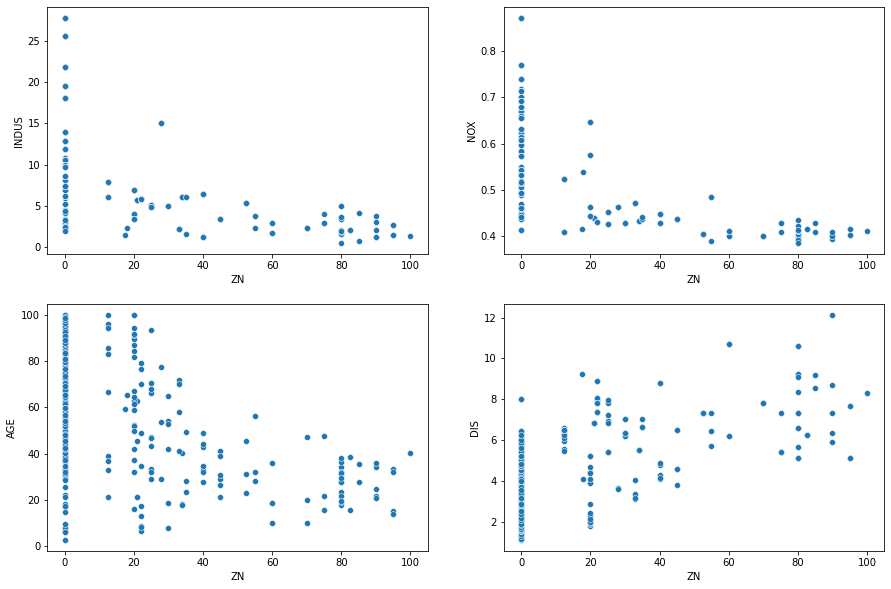

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(data=housing_data, x='ZN', y='INDUS', ax=axes[0, 0])
sns.scatterplot(data=housing_data, x='ZN', y='NOX', ax=axes[0, 1])
sns.scatterplot(data=housing_data, x='ZN', y='AGE', ax=axes[1, 0])
sns.scatterplot(data=housing_data, x='ZN', y='DIS', ax=axes[1, 1])
plt.show()

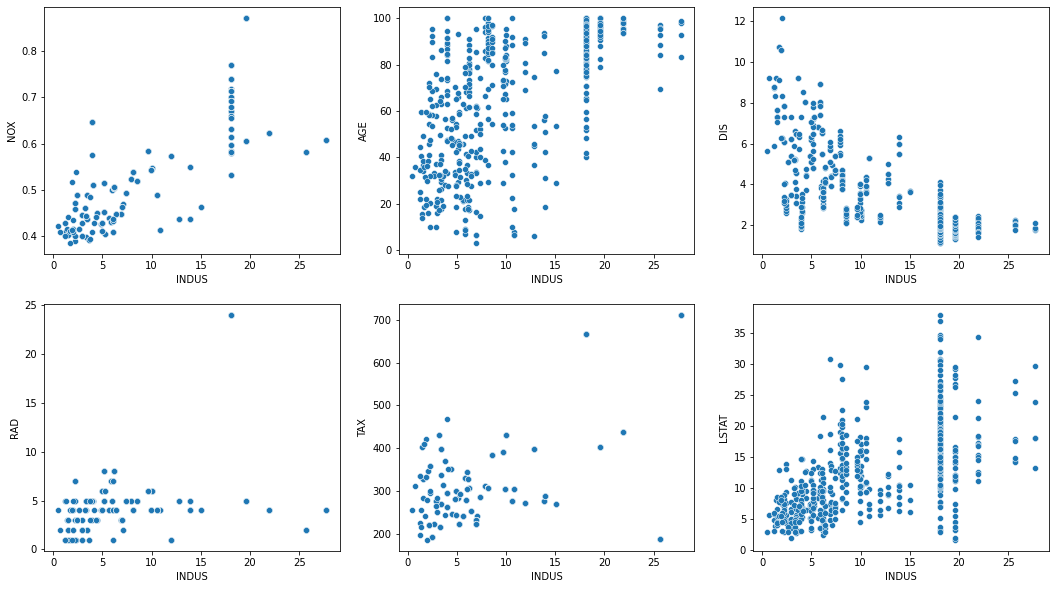

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.scatterplot(data=housing_data, x='INDUS', y='NOX', ax=axes[0, 0])
sns.scatterplot(data=housing_data, x='INDUS', y='AGE', ax=axes[0, 1])
sns.scatterplot(data=housing_data, x='INDUS', y='DIS', ax=axes[0, 2])
sns.scatterplot(data=housing_data, x='INDUS', y='RAD', ax=axes[1, 0])
sns.scatterplot(data=housing_data, x='INDUS', y='TAX', ax=axes[1, 1])
sns.scatterplot(data=housing_data, x='INDUS', y='LSTAT', ax=axes[1, 2])
plt.show()

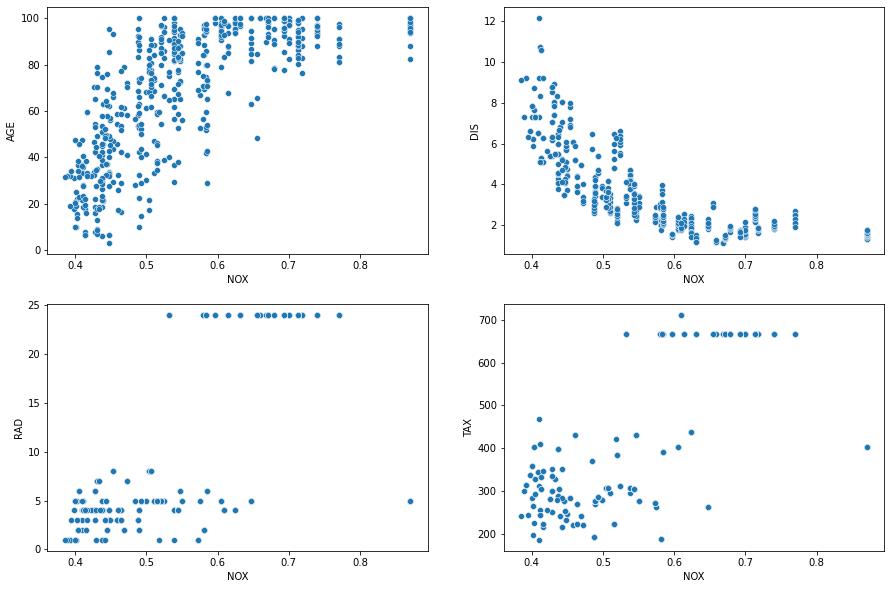

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(data=housing_data, x='NOX', y='AGE', ax=axes[0, 0])
sns.scatterplot(data=housing_data, x='NOX', y='DIS', ax=axes[0, 1])
sns.scatterplot(data=housing_data, x='NOX', y='RAD', ax=axes[1, 0])
sns.scatterplot(data=housing_data, x='NOX', y='TAX', ax=axes[1, 1])
plt.show()

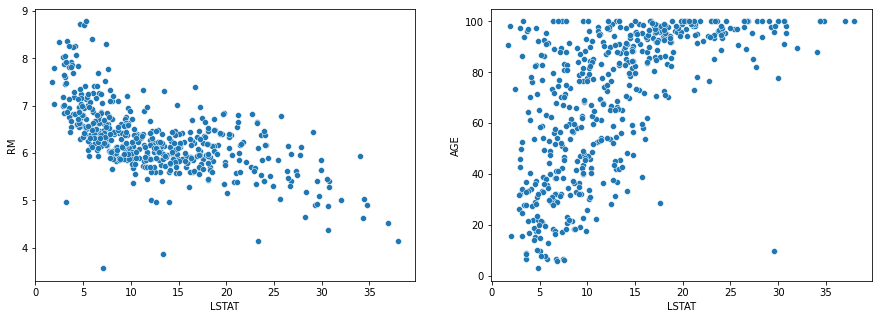

In [16]:
fig, axes = plt.subplots(1, 2, sharex = True, figsize=(15, 5))
sns.scatterplot(data=housing_data, x='LSTAT', y='RM', ax=axes[0])
sns.scatterplot(data=housing_data, x='LSTAT', y='AGE', ax=axes[1])
plt.show()

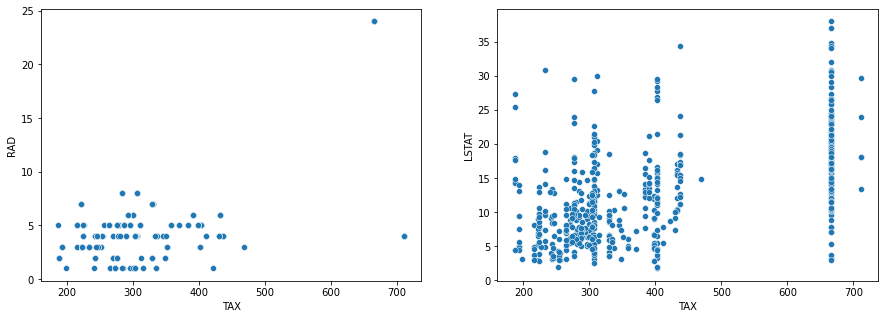

In [17]:
fig, axes = plt.subplots(1, 2, sharex = True, figsize=(15, 5))
sns.scatterplot(data=housing_data, x='TAX', y='RAD', ax=axes[0])
sns.scatterplot(data=housing_data, x='TAX', y='LSTAT', ax=axes[1])
plt.show()

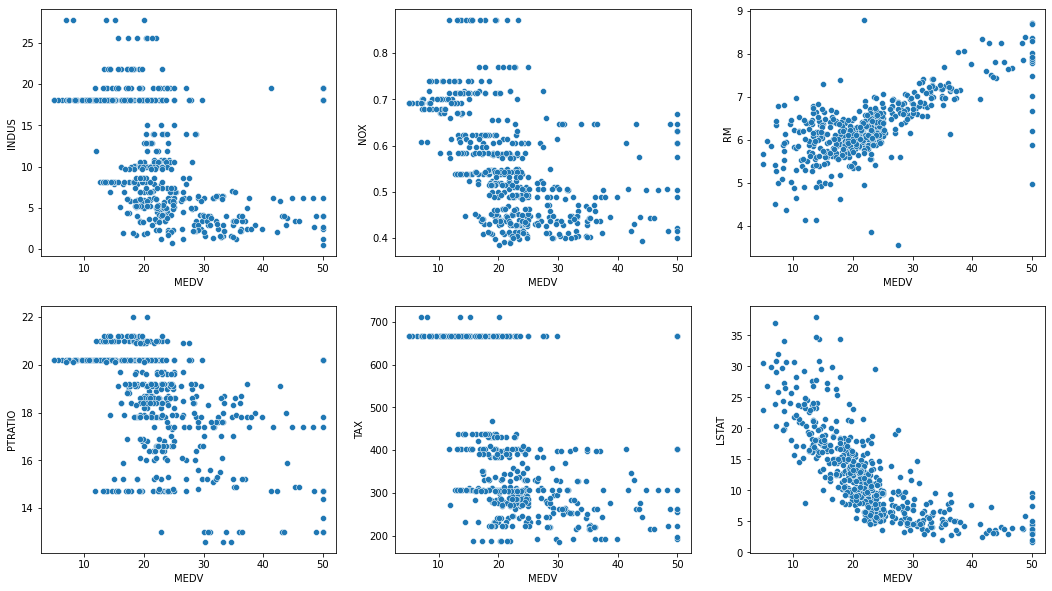

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.scatterplot(data=housing_data, x='MEDV', y='INDUS', ax=axes[0, 0])
sns.scatterplot(data=housing_data, x='MEDV', y='NOX', ax=axes[0, 1])
sns.scatterplot(data=housing_data, x='MEDV', y='RM', ax=axes[0, 2])
sns.scatterplot(data=housing_data, x='MEDV', y='PTRATIO', ax=axes[1, 0])
sns.scatterplot(data=housing_data, x='MEDV', y='TAX', ax=axes[1, 1])
sns.scatterplot(data=housing_data, x='MEDV', y='LSTAT', ax=axes[1, 2])
plt.show()

In [19]:
data_X = housing_data.drop('MEDV', axis=1)
data_y = housing_data['MEDV']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=0)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Part 2: Selecting the important features of the data

In [22]:
target_corr = data_corr['MEDV']
target_corr

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
Bk         0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [23]:
imp_features = target_corr.index[abs(target_corr) > 0.4]
imp_features = imp_features[imp_features != 'MEDV']
print(imp_features)

Index(['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')


In [24]:
data_X_imp = data_X[imp_features]
data_y_imp = data_y

In [25]:
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(data_X_imp, data_y_imp, test_size=0.2, random_state=0)

#### Part 3a: Estimating the Boston House Prices using Linear Regression

In [26]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [27]:
lr_y_pred = lr_model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, lr_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, lr_y_pred))
print('R2 Score:', r2_score(y_test, lr_y_pred))

Mean Absolute Error: 3.8429098
Mean Squared Error: 33.448986
R2 Score: 0.5892223213577091


In [28]:
ridge_model = Ridge()
ridge_param_grid = {'solver': ['svd', 'cholesky', 'lsqr', 'sag'],
                    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
                    'fit_intercept': [True, False],
                    'normalize': [True, False]
                   }
ridge_cv = KFold(n_splits=5)
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=ridge_cv, scoring='neg_mean_absolute_error', n_jobs=-1)
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sag']},
             scoring='neg_mean_absolute_error')

In [29]:
print('Ridge Regression Best Params:', ridge_grid.best_params_)
print('Ridge Regression Best Score:', ridge_grid.best_score_)

Ridge Regression Best Params: {'alpha': 0.1, 'fit_intercept': True, 'normalize': True, 'solver': 'sag'}
Ridge Regressiton Best Score: -3.1917717933654783


In [30]:
ridge_y_pred = ridge_grid.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, ridge_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, ridge_y_pred))
print('R2 Score:', r2_score(y_test, ridge_y_pred))

Mean Absolute Error: 3.9140587
Mean Squared Error: 36.11566
R2 Score: 0.5564736415496676


#### Part 3b: Estimating the Boston House Prices using Linear Regression with Important Features

In [31]:
lr_model = LinearRegression()
lr_model.fit(X_train_imp, y_train_imp)

LinearRegression()

In [32]:
lr_y_pred = lr_model.predict(X_test_imp)
print('Mean Absolute Error:', mean_absolute_error(y_test_imp, lr_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test_imp, lr_y_pred))
print('R2 Score:', r2_score(y_test_imp, lr_y_pred))

Mean Absolute Error: 4.394505
Mean Squared Error: 42.651993
R2 Score: 0.47620272483367654


In [33]:
ridge_model = Ridge()
ridge_param_grid = {'solver': ['svd', 'cholesky', 'lsqr', 'sag'],
                    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
                    'fit_intercept': [True, False],
                    'normalize': [True, False]
                   }
ridge_cv = KFold(n_splits=5)
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=ridge_cv, scoring='neg_mean_absolute_error', n_jobs=-1)
ridge_grid.fit(X_train_imp, y_train_imp)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sag']},
             scoring='neg_mean_absolute_error')

In [34]:
print('Ridge Regression Best Params:', ridge_grid.best_params_)
print('Ridge Regressiton Best Score:', ridge_grid.best_score_)

Ridge Regression Best Params: {'alpha': 0.001, 'fit_intercept': False, 'normalize': True, 'solver': 'lsqr'}
Ridge Regressiton Best Score: -3.4295209884643554


In [35]:
ridge_y_pred = ridge_grid.predict(X_test_imp)
print('Mean Absolute Error:', mean_absolute_error(y_test_imp, ridge_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test_imp, ridge_y_pred))
print('R2 Score:', r2_score(y_test_imp, ridge_y_pred))

Mean Absolute Error: 4.0980783
Mean Squared Error: 41.441013
R2 Score: 0.4910744142511475


#### Part 4a: Estimating the Boston House Prices using Support Vector Machine

In [36]:
svm_model = SVR()
svm_model.fit(X_train, y_train)

SVR()

In [37]:
svm_y_pred = svm_model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, svm_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, svm_y_pred))
print('R2 Score:', r2_score(y_test, svm_y_pred))

Mean Absolute Error: 3.611750709767946
Mean Squared Error: 41.06053610851429
R2 Score: 0.49574697163034387


In [38]:
svm_param_grid = {'C':[0.01, 0.1, 1, 10, 100],
                'kernel': ['linear', 'rbf'],
                'gamma' :[0.01, 0.1, 1, 10, 100]}
svm_cv = KFold(n_splits=5)
svm_grid = GridSearchCV(SVR(), svm_param_grid, cv=svm_cv, scoring='neg_mean_absolute_error', n_jobs=-1)
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_absolute_error')

In [39]:
print('SVM Best Params:', svm_grid.best_params_)
print('SVM Best Score:', svm_grid.best_score_)

SVM Best Params: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVM Best Score: -2.161312587590899


In [40]:
svm_y_pred = svm_grid.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, svm_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, svm_y_pred))
print('R2 Score:', r2_score(y_test, svm_y_pred))

Mean Absolute Error: 2.7499940881714577
Mean Squared Error: 20.401810859231365
R2 Score: 0.7494510329138371


#### Part 4b: Estimating the Boston House Prices using Support Vector Machine with important features

In [41]:
svm_model = SVR()
svm_model.fit(X_train_imp, y_train_imp)

SVR()

In [42]:
svm_y_pred = svm_model.predict(X_test_imp)
print('Mean Absolute Error:', mean_absolute_error(y_test_imp, svm_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test_imp, svm_y_pred))
print('R2 Score:', r2_score(y_test_imp, svm_y_pred))

Mean Absolute Error: 5.50653027623757
Mean Squared Error: 80.77879198713099
R2 Score: 0.007978113585639601


In [43]:
svm_param_grid = {'C':[0.01, 0.1, 1, 10],
                'kernel': ['linear', 'rbf'],
                'gamma' :[0.01, 0.1, 1, 10]}
svm_cv = KFold(n_splits=5)
svm_grid = GridSearchCV(SVR(), svm_param_grid, cv=svm_cv, scoring='neg_mean_absolute_error', n_jobs=-1)
svm_grid.fit(X_train_imp, y_train_imp)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_absolute_error')

In [44]:
print('SVM Best Params:', svm_grid.best_params_)
print('SVM Best Score:', svm_grid.best_score_)

SVM Best Params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVM Best Score: -3.113660588140698


In [45]:
svm_y_pred = svm_grid.predict(X_test_imp)
print('Mean Absolute Error:', mean_absolute_error(y_test_imp, svm_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test_imp, svm_y_pred))
print('R2 Score:', r2_score(y_test_imp, svm_y_pred))

Mean Absolute Error: 3.6375910893171888
Mean Squared Error: 35.190144854497014
R2 Score: 0.5678396145449389


#### Part 5a: Estimating the Boston House Prices using Random Forest

In [46]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
rf_y_pred = rf_model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, rf_y_pred))
print('R2 Score:', r2_score(y_test, rf_y_pred))

Mean Absolute Error: 2.6680392169017417
Mean Squared Error: 19.543470825446068
R2 Score: 0.7599920682345473


#### Part 5b: Estimating the Boston House Prices using Random Forest via Important Features

In [48]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_imp, y_train_imp)

RandomForestRegressor()

In [49]:
rf_y_pred = rf_model.predict(X_test_imp)
print('Mean Absolute Error:', mean_absolute_error(y_test_imp, rf_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test_imp, rf_y_pred))
print('R2 Score:', r2_score(y_test_imp, rf_y_pred))

Mean Absolute Error: 2.959068677846123
Mean Squared Error: 25.99959658641793
R2 Score: 0.6807061826849344


#### Part 6a: Estimating the Boston House Prices using Gradient Boosting Regressor

In [50]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [51]:
gb_y_pred = gb_model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, gb_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, gb_y_pred))
print('R2 Score:', r2_score(y_test, gb_y_pred))

Mean Absolute Error: 2.6457781465159815
Mean Squared Error: 16.877334306288596
R2 Score: 0.7927341495916711


#### Part 6b: Estimating the Boston House Prices using Gradient Boosting Regressor via Important Features

In [52]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_imp, y_train_imp)

GradientBoostingRegressor()

In [53]:
gb_y_pred = gb_model.predict(X_test_imp)
print('Mean Absolute Error:', mean_absolute_error(y_test_imp, gb_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test_imp, gb_y_pred))
print('R2 Score:', r2_score(y_test_imp, gb_y_pred))

Mean Absolute Error: 2.912611985891981
Mean Squared Error: 23.34475952053617
R2 Score: 0.7133094985978334
